In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from numpy import arange
import csv
from scipy.interpolate import interp1d

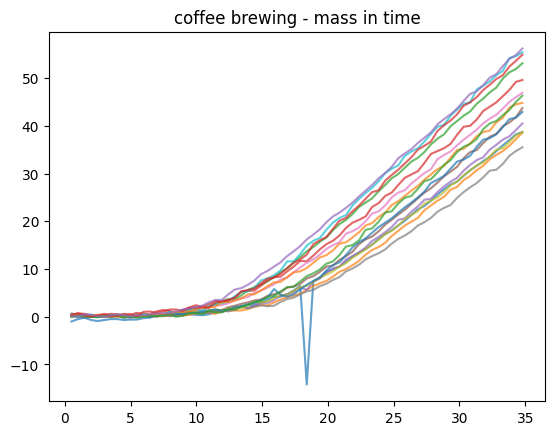

In [2]:
Time = []
Mass = []
plt.figure()
for i in range(1,16):
    name = 'modified_cof_mass' + str(i)
    csvfile = pd.read_csv('/mnt/c//Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/data_modded/' + name +'.txt')
    file = csvfile.to_numpy()
    #print(file[-1][0])
    time = file[0:70,0]/1000
    mass_in_cup = file[0:70,1]
    plt.plot(time,mass_in_cup,alpha = 0.7)
    plt.title('coffee brewing - mass in time')
    Time.append(time)
    Mass.append(mass_in_cup)
Mass = np.array(Mass)
Mass[Mass < 0] = 0

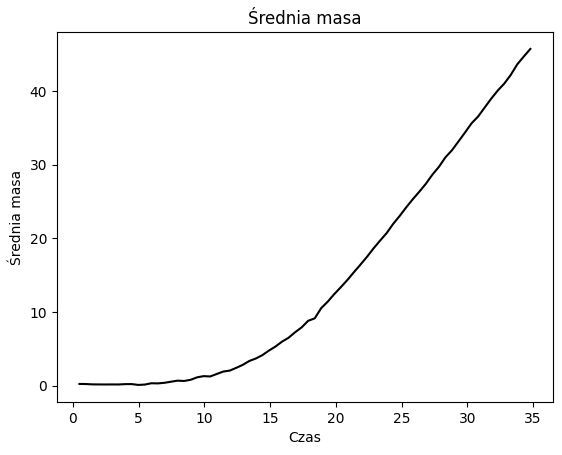

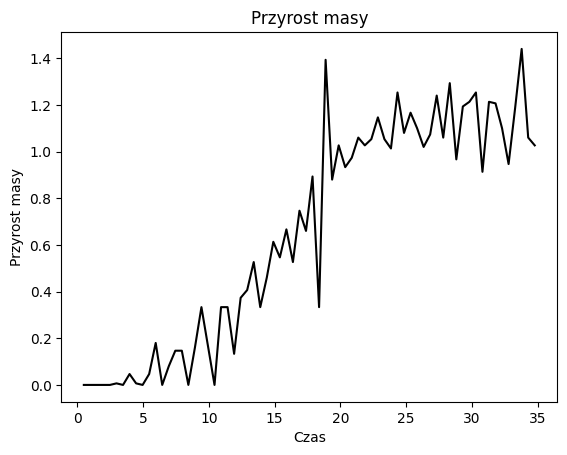

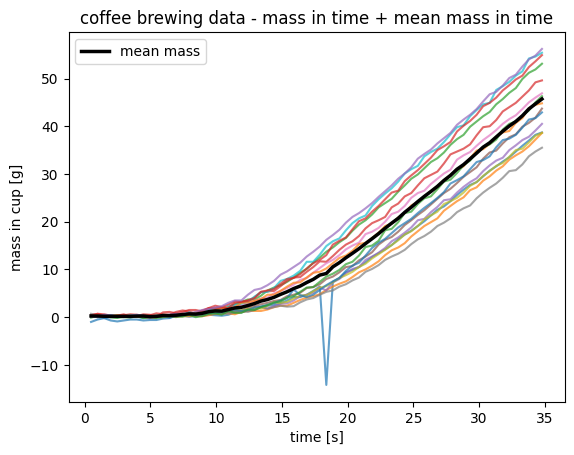

In [3]:
MeanMass = []
for j in range(Mass.shape[1]):
    MeanMass.append(np.mean(Mass[:, j]))  # calculates mean mass

std = []
for j in range(Mass.shape[1]):
    std.append(np.std(Mass[:, j]))  # calculates mean mass standard deviation
std = np.array(std)
#print(std)


plt.figure()
plt.plot(time, MeanMass, c = 'k')
plt.title('Średnia masa')
plt.xlabel('Czas')
plt.ylabel('Średnia masa')
plt.show()


przyrost = []
for i in range(0, len(MeanMass) - 1):
    difference = MeanMass[i + 1] - MeanMass[i]
    if difference < 0:
        difference = 0
    przyrost.append(difference)

przyrost.insert(0, 0) #tu liczy przyrost w dziwnych jednostkach, niżej jest korekta


plt.figure()
plt.plot(time, przyrost, color = 'k')
plt.title('Przyrost masy')
plt.xlabel('Czas')
plt.ylabel('Przyrost masy')
plt.show()

MeanMass = np.array(MeanMass)

Time = []
Mass = []
plt.figure()
for i in range(1,16):
    name = 'modified_cof_mass' + str(i)
    csvfile = pd.read_csv('/mnt/c//Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/data_modded/' + name +'.txt')
    file = csvfile.to_numpy()
    time = file[0:70,0]/1000
    mass_cup = file[0:70,1]
    plt.plot(time,mass_cup,alpha = 0.7)
    plt.title('coffee brewing data - mass in time + mean mass in time')
    Time.append(time)
    Mass.append(mass_cup)
#plt.errorbar(time, MeanMass, yerr=std, linewidth=3, c='g', alpha = 0.2)
plt.plot(time, MeanMass, linewidth = 2.5, c = 'k', label = "mean mass")
plt.xlabel("time [s]")
plt.ylabel("mass in cup [g]")
plt.legend()
plt.savefig("zbiorczy1")
Mass = np.array(Mass)
Mass[Mass < 0] = 0

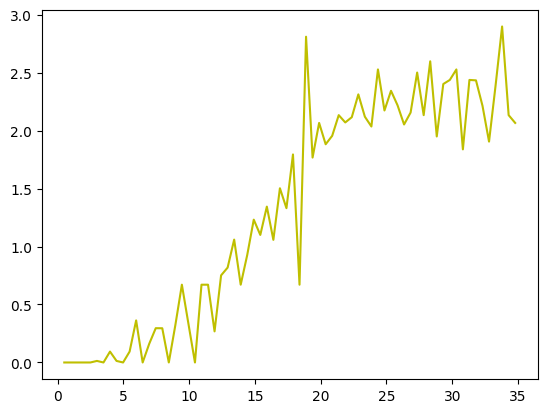

In [22]:
#print(time)
delta_t = []

for i in range(0, len(time) - 1):
    delta_t.append(time[i+1] - time[i])


#print(delta_t)
delta_t.append(0.4969999999999999)

#przyrost_mlps = []
#for i in range (0, len(przyrost)):
#    przyrost_mlps.append(przyrost[i] / delta_t [i]) 

for i in range (0, len(przyrost)):
    przyrost[i] = (przyrost[i] / delta_t [i]) 

plt.figure()
#plt.plot(time, przyrost_mlps, c = 'b')
plt.plot(time, przyrost, c = 'y')


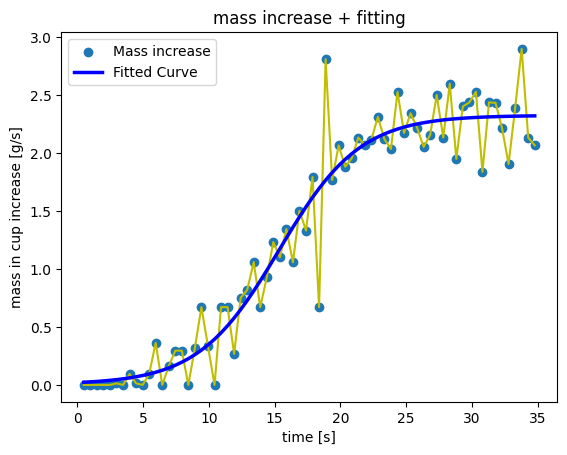

Fitted parameters for data:
Amplitude: 1.1597117276753917
Slope: 0.16269368655043198
Offset: 1.1645611857281968
Shift: 15.35547006975688


In [23]:
# Define the shifted tanh function with renamed variable names
def shifted_tanh_func(x, amplitude, slope, offset, shift):
    return amplitude * np.tanh(slope * (x - shift)) + offset

# Generate new example data
x_data_new = time
y_data_new = przyrost

# Initial guess for the parameters
initial_guess_new = [1, 1, 1, 1]

# Fit the shifted tanh function to the new data
params_new, covariance_new = curve_fit(shifted_tanh_func, x_data_new, y_data_new, p0=initial_guess_new)

# Get the fitted parameters for the new data
amplitude_fit_new, slope_fit_new, offset_fit_new, shift_fit_new = params_new

# Generate the fitted curve using the fitted parameters for the new data
y_fit_new = shifted_tanh_func(x_data_new, amplitude_fit_new, slope_fit_new, offset_fit_new, shift_fit_new)

# Plot the new data and the fitted curve
plt.scatter(x_data_new, y_data_new, label='Mass increase')
plt.plot(time, przyrost, c = "y")
plt.plot(x_data_new, y_fit_new, label='Fitted Curve', color='b', linewidth = 2.5)
plt.xlabel('time [s]')
plt.ylabel('mass in cup increase [g/s]')
plt.legend()
plt.title('mass increase + fitting')
plt.savefig("tanhfit1")
plt.show()

print("Fitted parameters for data:")
print("Amplitude:", amplitude_fit_new)
print("Slope:", slope_fit_new)
print("Offset:", offset_fit_new)
print("Shift:", shift_fit_new)


[[ 5.43384796e+01 -5.29097109e-02]
 [-5.29097109e-02  6.78689504e-05]]
[59.71018977 -0.06286441]


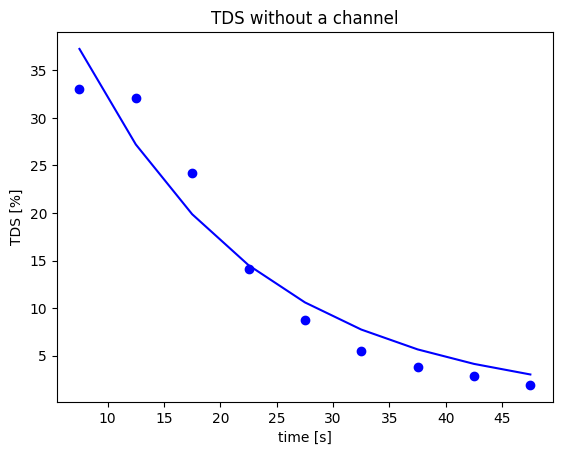

In [24]:
csvfile8 = pd.read_csv ('/mnt/c/Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/TDS4.txt', delimiter='\t')
file8 = csvfile8.to_numpy()
TDSmean = file8[:, 1]
TDStime = file8[:, 0]

def exp(t,a,b):
    f = a*np.exp(b*t)
    return f


popt, pcov = curve_fit(exp, TDStime, TDSmean, p0 = (1, 0) )
print(pcov)

print(popt)

pcov = np.array(np.sqrt(np.diag(pcov)))


timeTDS = np.arange(min(time)-0.5,max(time)+0.5,1)

TDSexp = exp(time,popt[0],popt[1])
TDSexp1 = exp(TDStime, popt[0], popt[1])

#plt.plot(time, TDSexp)
plt.plot(TDStime, TDSexp1, c = 'b')
plt.scatter(TDStime, TDSmean, c = "b")
plt.title("TDS without a channel")
plt.xlabel("time [s]")
plt.ylabel("TDS [%]")
plt.savefig("TDSbezkanalu")


<function matplotlib.pyplot.show(close=None, block=None)>

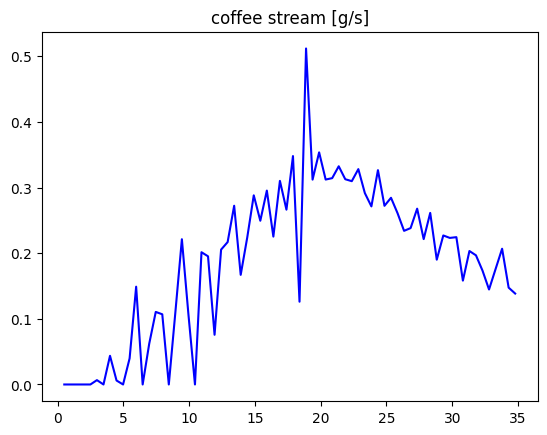

In [25]:
stream_nochannel = TDSexp*przyrost /100 #plotuje strumień masy rozpuszczonej kawy, TDS wyrażamy w %
plt.figure()
plt.plot(time, stream_nochannel, c = 'b')
plt.title('coffee stream [g/s]')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

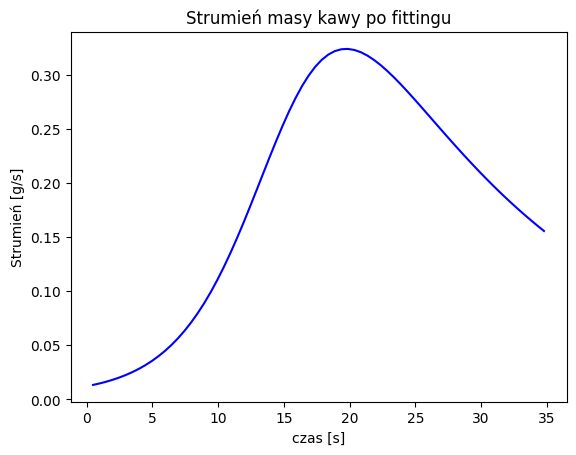

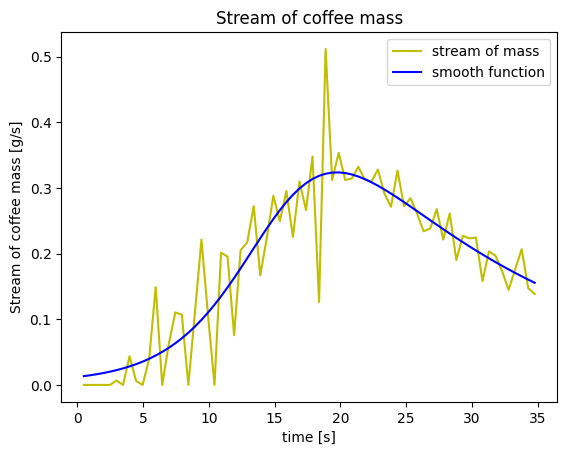

In [41]:
stream_nochannel_fitted = TDSexp*y_fit_new /100 #plotuje strumień masy rozpuszczonej kawy, TDS wyrażamy w %
plt.figure()
plt.plot(time, stream_nochannel_fitted, c = 'b')
plt.title('Strumień masy kawy po fittingu')
plt.ylabel("Strumień [g/s]")
plt.xlabel("czas [s]")
plt.show

plt.figure()
plt.ylabel("Stream of coffee mass [g/s]")
plt.xlabel("time [s]")
plt.plot(time, stream_nochannel, c = 'y', label = 'stream of mass')
plt.plot(time, stream_nochannel_fitted, c = 'b', label = 'smooth function')
plt.legend()
plt.title("Stream of coffee mass")
plt.savefig("przyrost")
plt.show

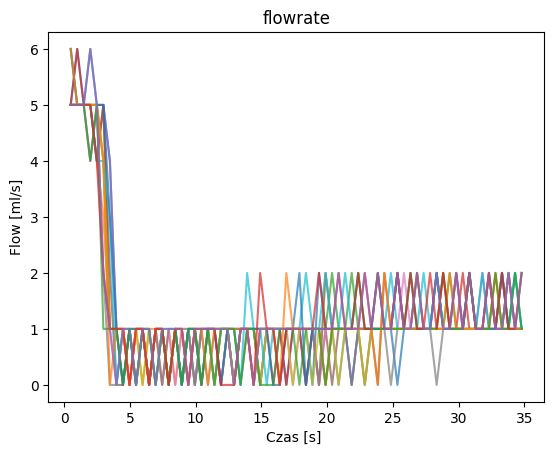

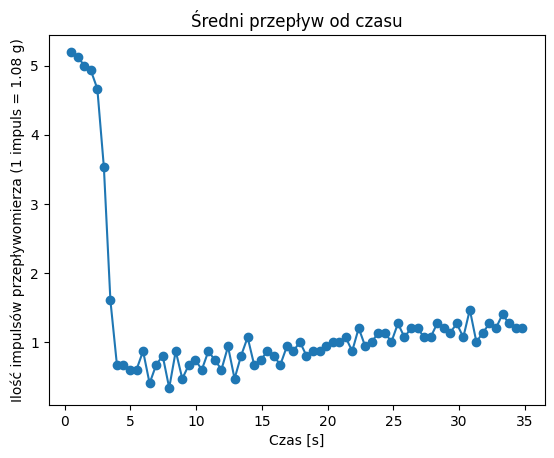

In [27]:
#ANALIZA FLOW


Flow = []
plt.figure()


for i in range(1, 16):
    name = 'modified_cof_mass' + str(i)
    csvfile = pd.read_csv('/mnt/c//Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/data_modded/' + name + '.txt')
    file = csvfile.to_numpy()
    flowrate = file[0:70, 4]
    plt.plot(time, flowrate, alpha=0.7)
    plt.title('flowrate')
    plt.xlabel("Czas [s] ")
    plt.ylabel("Flow [ml/s]")
    Flow.append(flowrate)

#print(Flow)

MeanFLOW = [np.mean(column) for column in zip(*Flow)]

plt.figure()
plt.xlabel("Czas [s]")
plt.ylabel("Ilość impulsów przepływomierza (1 impuls = 1.08 g)")
plt.scatter(time, MeanFLOW)
plt.plot(time, MeanFLOW)
plt.title("Średni przepływ od czasu")
plt.savefig("IMPpersec")


In [168]:
#TU KOŃCZY SIĘ ANALIZA DLA NORMALNEGO SHOTA





# :)

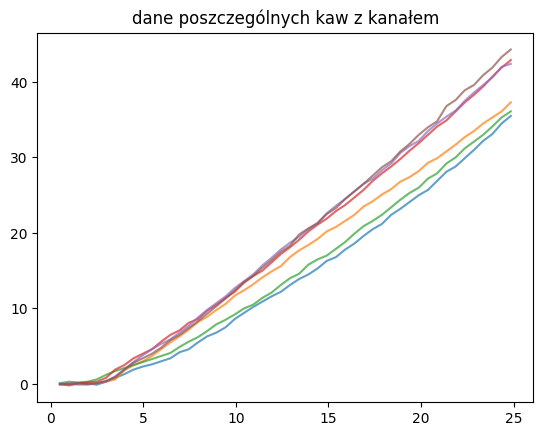

In [28]:
Time_channel = []
Mass_channel = []
plt.figure()
for i in range(1,7):
    name = 'modified_channel' + str(i)
    csvfile = pd.read_csv('/mnt/c//Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/channel_code/data_modded/' + name +'.csv')
    file = csvfile.to_numpy()
    #print(file[-1][0])
    time_chan = file[0:50,0]/1000
    mass_in_cup_chan = file[0:50,1]
    plt.plot(time_chan,mass_in_cup_chan,alpha = 0.7)
    plt.title('dane poszczególnych kaw z kanałem')
    Time_channel.append(time_chan)
    Mass_channel.append(mass_in_cup_chan)
Mass_channel = np.array(Mass_channel)
Mass_channel[Mass_channel < 0] = 0

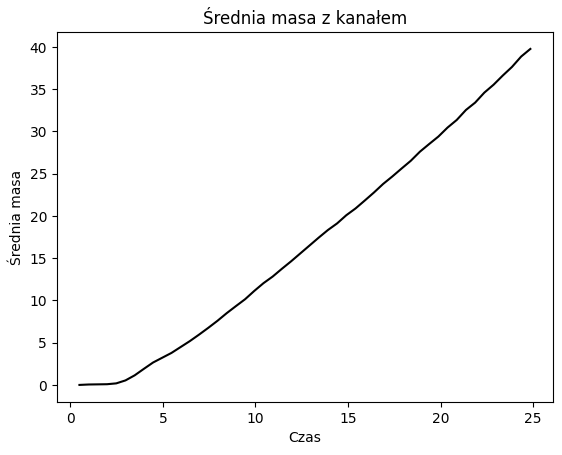

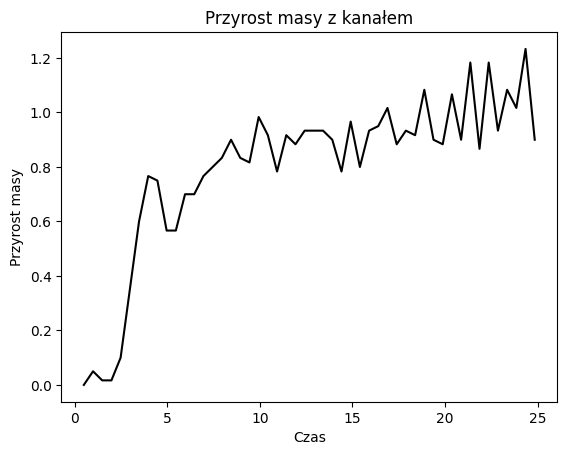

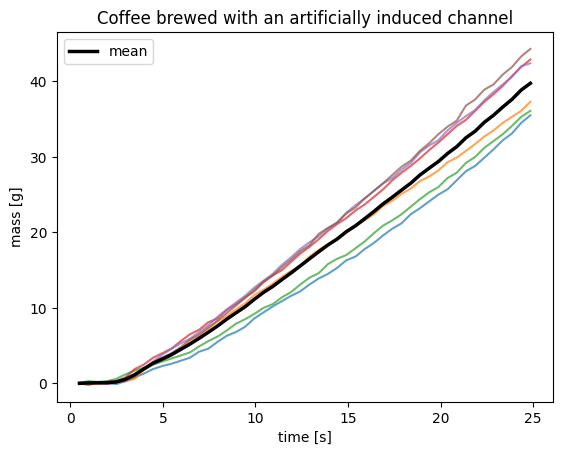

In [29]:
MeanMass_channel = []
for j in range(Mass_channel.shape[1]):
    MeanMass_channel.append(np.mean(Mass_channel[:, j]))  # calculates mean mass

std_chan = []
for j in range(Mass_channel.shape[1]):
    std_chan.append(np.std(Mass_channel[:, j]))  # calculates mean mass standard deviation
std_chan = np.array(std_chan)
#print(std)


plt.figure()
plt.plot(time_chan, MeanMass_channel, c = 'k')
plt.title('Średnia masa z kanałem')
plt.xlabel('Czas')
plt.ylabel('Średnia masa')
plt.show()



przyrost_channel = []
for i in range(0, len(MeanMass_channel) - 1):
    difference = MeanMass_channel[i + 1] - MeanMass_channel[i]
    if difference < 0:
        difference = 0
    przyrost_channel.append(difference)

przyrost_channel.insert(0, 0)


plt.figure()
plt.plot(time_chan, przyrost_channel, color = 'k')
plt.title('Przyrost masy z kanałem')
plt.xlabel('Czas')
plt.ylabel('Przyrost masy')
plt.show()

MeanMass_channel = np.array(MeanMass_channel)

Time = []
Mass = []
plt.figure()
for i in range(1,7):
    name = 'modified_channel' + str(i)
    csvfile = pd.read_csv('/mnt/c//Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/channel_code/data_modded/' + name +'.csv')
    file = csvfile.to_numpy()
    time_chan = file[0:50,0]/1000
    mass_in_cup_chan = file[0:50,1]
    plt.plot(time_chan,mass_in_cup_chan,alpha = 0.7)
    plt.title('Coffee brewed with an artificially induced channel')
    #Time_channel.append(time_chan)
    #Mass_channel.append(mass_in_cup_chan)
#plt.errorbar(time_chan, MeanMass_channel, yerr=std_chan, linewidth=3, c='g', alpha = 0.2)
plt.plot(time_chan, MeanMass_channel, linewidth = 2.5, c = 'k', label = "mean")
plt.legend()
plt.xlabel("time [s]")
plt.ylabel("mass [g]")
plt.savefig("kanaly")
Mass = np.array(Mass)
Mass[Mass < 0] = 0

In [30]:
delta_t_chan = []
for i in range(0, len(time_chan) - 1):
    delta_t_chan.append(time_chan[i+1] - time_chan[i])


#print(delta_t_chan)
delta_t_chan.append(0.4969999999999999)

for i in range (0, len(przyrost_channel)):
    przyrost_channel[i] = (przyrost_channel[i] / delta_t_chan [i]) 

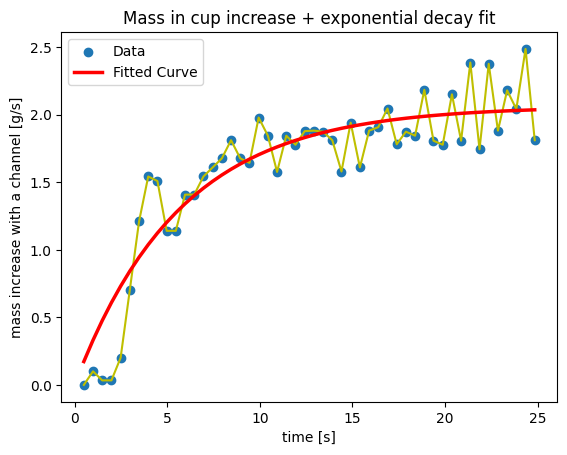

Fitted parameters for data:
a: 2.0618089386126566
b: 0.17613534962978522


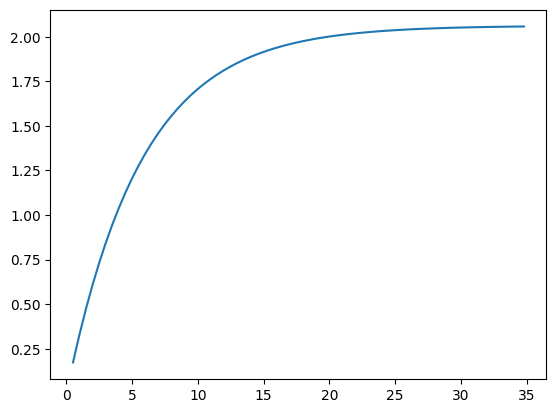

In [42]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the function to fit: a * (1 - e^(-bx))
def exponential_decay_func(x, a, b):
    return a * (1 - np.exp(-b * x))

# Generate new example data
x_data_new = time
y_data = przyrost_channel
x_data = time_chan

# Initial guess for the parameters
initial_guess = [1, 1]

# Fit the exponential decay function to the new data
params, covariance = curve_fit(exponential_decay_func, x_data, y_data, p0=initial_guess)

# Get the fitted parameters for the new data
a_fit, b_fit = params

# Generate the fitted curve using the fitted parameters for the new data
y_fit_channel = exponential_decay_func(x_data, a_fit, b_fit)

# Plot the new data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_data, c = 'y')
plt.plot(x_data, y_fit_channel, label='Fitted Curve', color='red', linewidth = 2.5)
plt.xlabel('time [s]')
plt.ylabel('mass increase with a channel [g/s]')
plt.legend()
plt.title('Mass in cup increase + exponential decay fit')
plt.savefig("fitkanal")
plt.show()

print("Fitted parameters for data:")
print("a:", a_fit)
print("b:", b_fit)

y_fit_channel_longer = exponential_decay_func(time, a_fit, b_fit)

plt.figure()
plt.plot(time, y_fit_channel_longer)
plt.show()

y_fit_channel_medium = exponential_decay_func(time_chan, a_fit, b_fit)


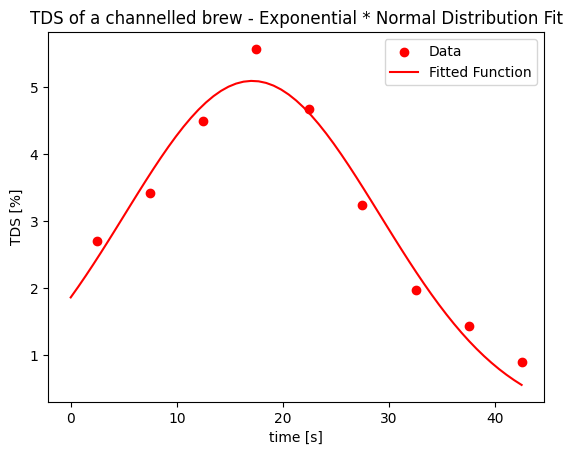

Optimized Parameters:
a: 9.616109699902575
b: 0.032667892060946495
mu: 21.848269958799058
sigma: 12.049375232049213


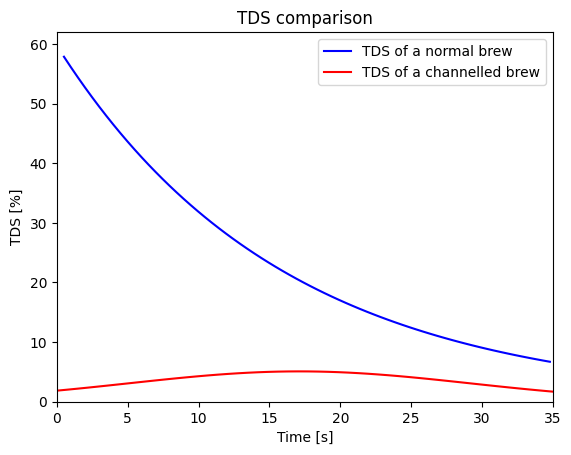

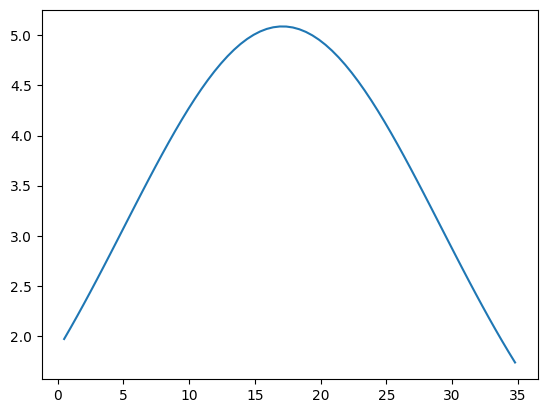

In [32]:
csvfile9 = pd.read_csv ('/mnt/c/Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/kody_od_czerepa/TDS5.txt', delimiter='\t')
file9 = csvfile9.to_numpy()

TDSmeanchannel = file9[:, 1]
time29 = file9[:, 0]

def exponential_normal(x, a, b, mu, sigma):
    exponential_term = a * np.exp(-b * x)
    normal_term = np.exp(-0.5 * ((x - mu) / sigma)**2)
    return exponential_term * normal_term

# Sample data (replace this with your actual data)
x_data = time29
y_data = TDSmeanchannel

# Fit the function to the data
initial_guess = [1, 1, 0, 1]  # Initial guess for the parameters
optimized_params, _ = curve_fit(exponential_normal, x_data, y_data, p0=initial_guess)

# Generate some example data for plotting
x_plot = np.linspace(0, max(time29), 61)
y_fit = exponential_normal(x_plot, *optimized_params)

TDSchannel_longer = exponential_normal(time, *optimized_params)

# Plot the original data and the fitted function
plt.scatter(x_data, y_data, c = "r", label='Data')
plt.plot(x_plot, y_fit, 'r-', label='Fitted Function')
plt.xlabel('time [s]')
plt.ylabel('TDS [%]')
plt.title('TDS of a channelled brew - Exponential * Normal Distribution Fit')
plt.legend()
plt.savefig("TDSkanal")
#plt.grid(True)
plt.show()

plt.figure()
plt.plot(time, TDSexp, c = 'b', label = 'TDS of a normal brew')
plt.plot(x_plot, y_fit, c = 'r', label='TDS of a channelled brew')
plt.xlabel('Time [s]')
plt.ylabel('TDS [%]')
#plt.tick_params(axis='both', labelsize=16)
plt.legend()
plt.xlim(0, 35)
plt.ylim(0, 62)
plt.title("TDS comparison")
plt.savefig("TDScompared")
plt.show


print("Optimized Parameters:")
print(f"a: {optimized_params[0]}")
print(f"b: {optimized_params[1]}")
print(f"mu: {optimized_params[2]}")
print(f"sigma: {optimized_params[3]}")

plt.figure()
plt.plot(time, TDSchannel_longer)
plt.show()

TDSchannel_medium = exponential_normal(time_chan, *optimized_params)




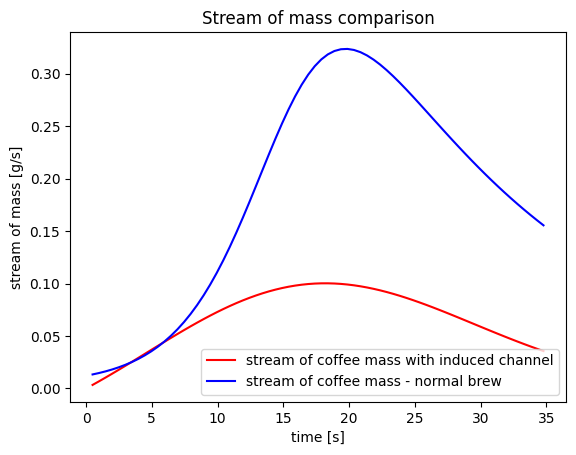

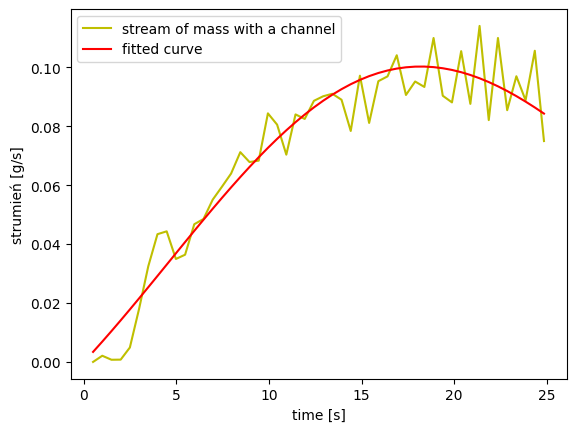

In [43]:
strumien_kanal = TDSchannel_longer * y_fit_channel_longer /100

plt.figure()
plt.plot(time, strumien_kanal, c = 'r', label = 'stream of coffee mass with induced channel')
plt.plot(time, stream_nochannel_fitted, c = 'b', label = 'stream of coffee mass - normal brew')
plt.legend()
plt.title("Stream of mass comparison")
plt.xlabel("time [s]")
plt.ylabel("stream of mass [g/s]")
plt.savefig(fname = 'wykres1')
plt.show()

strumien_kanal_brzydki = TDSchannel_medium * przyrost_channel / 100
strumienkanalbrzydal = TDSchannel_medium *y_fit_channel_medium /100
plt.figure()
plt.plot(time_chan, strumien_kanal_brzydki, label = "stream of mass with a channel", c = "y")
plt.plot(time_chan, strumienkanalbrzydal, label = "fitted curve", c = "r")
plt.xlabel("time [s]")
plt.ylabel("strumień [g/s]")
plt.legend()
plt.savefig("stream_channel")

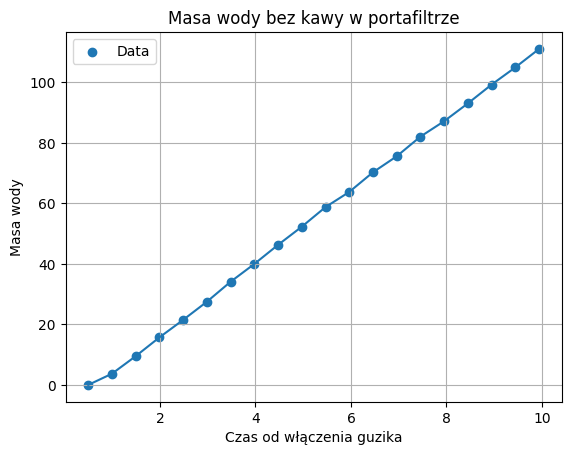

Fitted slope (m): 11.954020739828518
Fitted intercept (b): -7.531080219718706


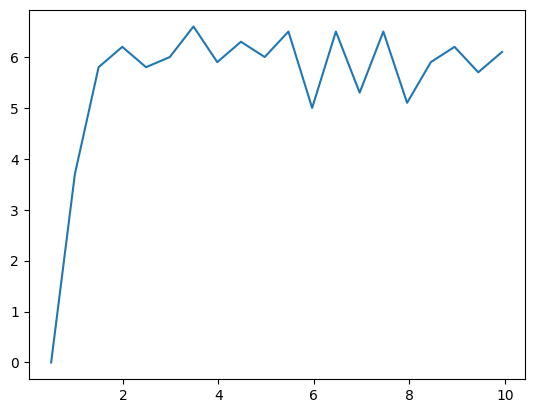

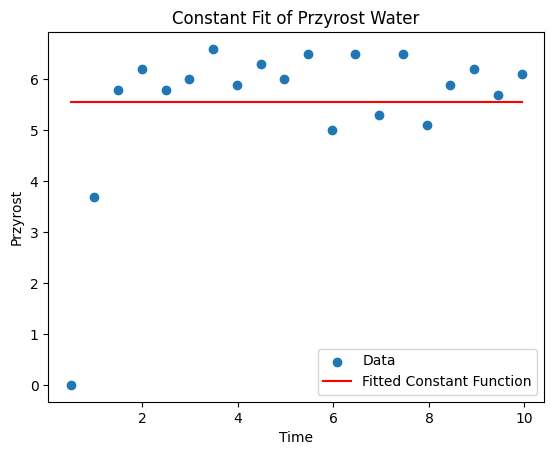

Fitted parameter for constant function:
c: 5.555000000009937


Text(0, 0.5, 'strumień masy wody')

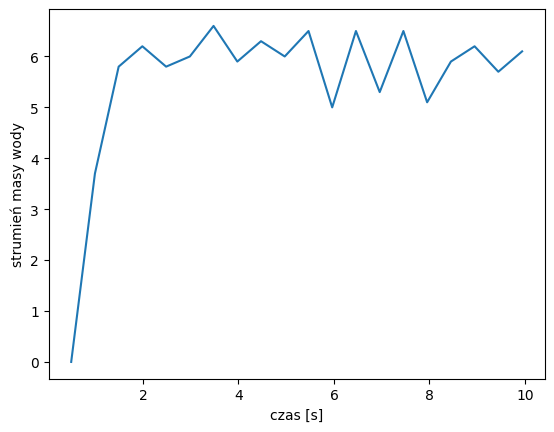

In [34]:
csvfile3 = pd.read_csv ('/mnt/c/Users/myckf/OneDrive/Dokumenty/Documents/franek-personal/studia/fizyka/kawa/channel/modified_flow_rate1.csv')
file3 = csvfile3.to_numpy()

water_mass = file3[0:20,1]
water_time = file3[0:20,0]
pressure2 = file3[0:20,3]

water_time = water_time / 1000

def linear_function(x, m, b):
    return m * x + b

# Step 4: Use curve_fit to fit the data
params, covariance = curve_fit(linear_function, water_time, water_mass)

# Extract the fitted parameters
m, b = params

# Create a fitted curve using the fitted parameters
fitted_curve_water = linear_function(water_time, m, b)

plt.plot(water_time, water_mass)
#plt.plot(water_time, fitted_curve_water)

# Plot the original data and the fitted curve
plt.scatter(water_time, water_mass, label='Data')
#plt.plot(water_time, fitted_curve_water, label='Fitted Curve', color='red')
plt.xlabel('Czas od włączenia guzika')
plt.ylabel('Masa wody')
plt.title("Masa wody bez kawy w portafiltrze")
plt.legend()
plt.grid(True)

plt.show()

# Print the fitted parameters
print("Fitted slope (m):", m)
print("Fitted intercept (b):", b)


#plt.plot(water_time, water_mass)

przyrost_water = []
for i in range(0, len(water_time) - 1):
    difference = water_mass[i + 1] - water_mass[i]
    if difference < 0:
        difference = 0
    przyrost_water.append(difference)

przyrost_water.insert(0, 0)

plt.figure()
plt.plot(water_time,przyrost_water)
plt.show()

# Define the constant function
def constant_func(x, c):
    return np.full_like(x, c)

# Initial guess for the parameter
initial_guess = [1]

# Fit the constant function to the data
params, covariance = curve_fit(constant_func, water_time, przyrost_water, p0=initial_guess)

# Get the fitted parameter
c_fit = params[0]

# Generate the fitted values using the fitted parameter
y_fit_water = constant_func(water_time, c_fit)

# Plot the data and the fitted constant function
plt.figure()
plt.scatter(water_time, przyrost_water, label='Data')
plt.plot(water_time, y_fit_water, label='Fitted Constant Function', color='red')
plt.xlabel('Time')
plt.ylabel('Przyrost')
plt.legend()
plt.title('Constant Fit of Przyrost Water')
plt.show()

print("Fitted parameter for constant function:")
print("c:", c_fit)

y_fit_water_longer = constant_func(time, c_fit)

plt.figure()
plt.plot(water_time, przyrost_water)
plt.xlabel("czas [s]")
plt.ylabel("strumień masy wody")
#plt.plot(water_time, y_fit_water)
#plt.savefig(fname = 'wykres2')




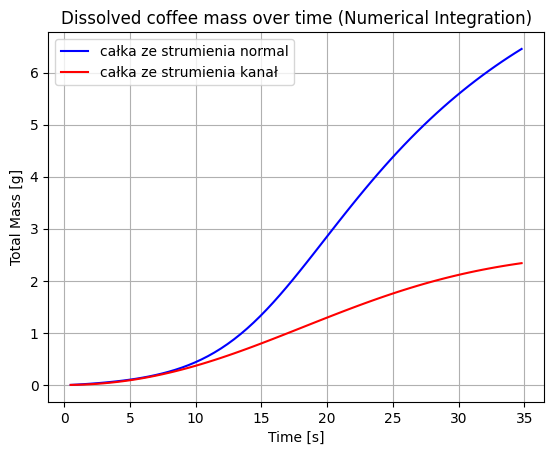

In [40]:
time_points = time  
stream_values = stream_nochannel_fitted
stream_values_channel = strumien_kanal

# Convert time data to numpy array for indexing
time_array = np.array(time_points)

# Initialize an array to store the cumulative mass values
massa = np.zeros_like(time_array)
channel_mass = np.zeros_like(time_array)

# Numerical integration using trapezoidal rule
for i in range(1, len(time_array)):
    dt = time_array[i] - time_array[i - 1]
    massa[i] = massa[i - 1] + 0.5 * (stream_values[i] + stream_values[i - 1]) * dt

# Numerical integration using trapezoidal rule
for j in range(1, len(time_array)):
    dt = time_array[j] - time_array[j - 1]
    channel_mass[j] = channel_mass[j - 1] + 0.5 * (stream_values_channel[j] + stream_values_channel[j - 1]) * dt

# Plot the mass over time
plt.plot(time_array, massa, label = 'całka ze strumienia normal', c = "b")
plt.plot(time_array, channel_mass, label ='całka ze strumienia kanał', c = "r")
plt.xlabel('Time [s]')
plt.ylabel('Total Mass [g]')
plt.title('Dissolved coffee mass over time (Numerical Integration)')
plt.legend()
plt.grid(True)
plt.savefig(fname = 'calka1')
plt.show()

#plt.figure()
#plt.plot(time, y_fit_water_longer)
#plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

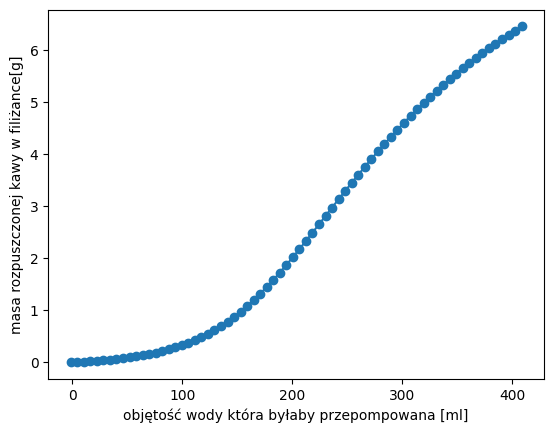

In [177]:
fitted_curve_water_long = linear_function(time, m, b)
plt.plot(fitted_curve_water_long, massa)
plt.xlabel("objętość wody która byłaby przepompowana [ml]")
plt.ylabel("masa rozpuszczonej kawy w filiżance[g]")
plt.scatter(fitted_curve_water_long, massa)
plt.show

[10.483870967741936, 10.328638497652584, 10.040160642570282, 9.946236559139786, 9.38967136150235, 7.095046854082995, 3.2258064516129035, 1.341381623071763, 1.3413816230717641, 1.2072434607645877, 1.2072434607645877, 1.7473118279569908, 0.8032128514056222, 1.3413816230717641, 1.6129032258064502, 0.6706908115358833, 1.7402945113788448, 0.9408602150537626, 1.3413816230717641, 1.472556894243643, 1.2096774193548376, 1.7437961099932935, 1.4755197853789406, 1.2072434607645877, 1.87793427230047, 0.938967136150235, 1.6096579476861173, 2.146210596914823, 1.3440860215053752, 1.472556894243643, 1.7437961099932935, 1.6129032258064502, 1.3386880856760344, 1.87793427230047, 1.747311827956994, 2.008032128514052, 1.6096579476861173, 1.747311827956994, 1.7402945113788448, 1.87793427230047, 2.01612903225807, 2.008032128514052, 2.146210596914823, 1.747311827956994, 2.409638554216862, 1.8817204301075185, 2.012072434607646, 2.2757697456492747, 2.2849462365591293, 2.012072434607646, 2.5435073627844837, 2.150

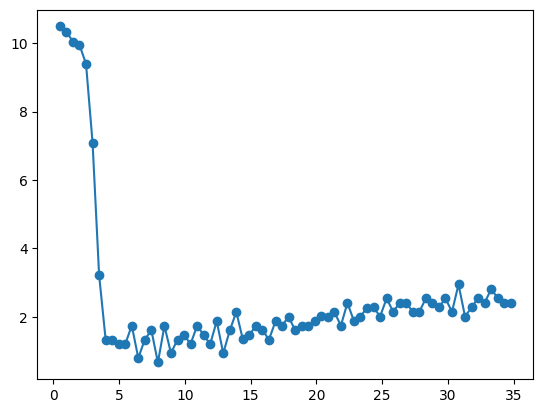

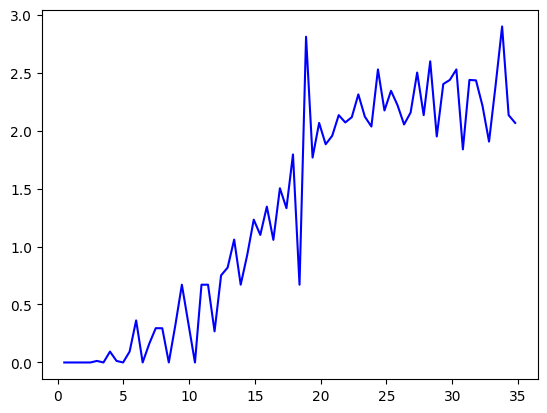

In [36]:
#print(time)
#delta_t = []

#for i in range(0, len(time) - 1):
#    delta_t.append(time[i+1] - time[i])


#print(delta_t)
#delta_t.append(0.4969999999999999)

#print(len(delta_t))

flowrate_calculated = []

for i in range (0, len(MeanFLOW)):
    flowrate_calculated.append(MeanFLOW[i] / delta_t [i])

print(flowrate_calculated)

plt.figure()
plt.plot(time, flowrate_calculated) #TU MAMY FLOWRATE POLICZONY W ML/S
plt.scatter(time, flowrate_calculated)
plt.show()

#przyrost_mlps = []
#for i in range (0, len(przyrost)):
#    przyrost_mlps.append(przyrost[i] / delta_t [i]) 

plt.figure()
plt.plot(time, przyrost, c = 'b')
#plt.plot(time, przyrost, c = 'y')


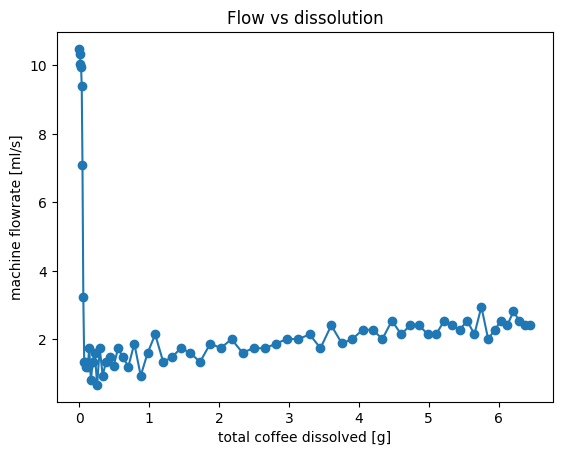

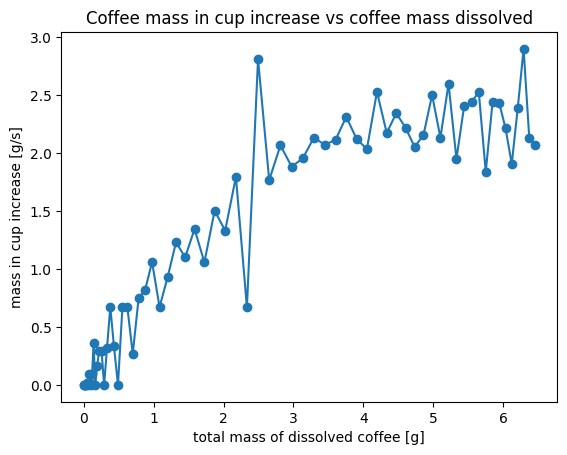

In [39]:
plt.plot(massa, flowrate_calculated)
plt.xlabel("total coffee dissolved [g]")
plt.ylabel("machine flowrate [ml/s]")
plt.scatter(massa, flowrate_calculated)
plt.title("Flow vs dissolution")
plt.savefig("RADOSTOWYscatter")
plt.show

plt.figure()
plt.title("Coffee mass in cup increase vs coffee mass dissolved")
plt.xlabel("total mass of dissolved coffee [g]")
plt.ylabel("mass in cup increase [g/s]")
plt.plot(massa, przyrost)
plt.scatter(massa, przyrost)
plt.savefig("Radostowy2")